# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Load data

In [2]:
# define the path and assign dataframe to the "df" variable

path = r'C:\Users\Jakov\2023 Instacart Basket Analysis'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_with_users.pkl'))

# 03.

In [3]:
# define regions in lists

northeast = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]
midwest = ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]
south = ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]
west = ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]

In [4]:
# derive new column "region" from the "state" column

df.loc[df['state'].isin(northeast), "region"] = "Northeast"
df.loc[df['state'].isin(midwest), "region"] = "Midwest"
df.loc[df['state'].isin(south), "region"] = "South"
df.loc[df['state'].isin(west), "region"] = "West"

In [112]:
# create a crosstab to see spending habits across regions

crosstab = pd.crosstab(df['spending_flag'], df['region'])
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,156154,108245,210017,160478
Low spender,7441171,5614491,10581868,8132435


# 04.

In [5]:
# create new dataframe with users with 5 or more orders placed

df2 = df[df['max_order'] >= 5]

In [328]:
df.shape[0] - df2.shape[0]

1440295

In [114]:
# export dataframe with users with 5 or more orders placed

df2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_users.pkl'))

# 05.

In [70]:
# Categorization of user by marital status, income, number of dependants and age

df2.loc[df2['age'].between(12, 28, inclusive = True) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Young Single Adult"
df2.loc[df2['age'].between(12, 28, inclusive = True) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['married'])), 'user_profile'] = "Young Married Adult"
df2.loc[df2['age'].between(12, 28, inclusive = True) & (df2['n_dependants'] > 0) & (df2['fam_status'].isin(['married'])), 'user_profile'] = "Young Married Adult Parent"
df2.loc[df2['age'].between(12, 28, inclusive = True) & (df2['n_dependants'] > 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Young Single Adult Parent"


df2.loc[df2['age'].between(29, 64, inclusive = True) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Single Adult"
df2.loc[df2['age'].between(29, 64, inclusive = True) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['married'])), 'user_profile'] = "Married Adult"
df2.loc[df2['age'].between(29, 64, inclusive = True) & (df2['n_dependants'] > 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Single Adult Parent"
df2.loc[df2['age'].between(29, 64, inclusive = True) & (df2['n_dependants'] > 0) & (df2['fam_status'].isin(['married'])), 'user_profile'] = "Married Adult Parent"

                                                                                
df2.loc[(df2['age'] > 65) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Single Senior"
df2.loc[(df2['age'] > 65) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['married'])), 'user_profile'] = "Married Senior"
df2.loc[(df2['age'] > 65) & (df2['n_dependants'] > 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Single Senior Parent"
df2.loc[(df2['age'] > 65) & (df2['n_dependants'] > 0) & (df2['fam_status'].isin(['married'])), 'user_profile'] = "Married Senior Parent"


df2.loc[df2['income'].between(25903, 40000, inclusive = True), 'income_profile'] = 'Low-income earner (25k - 40k($))'
df2.loc[df2['income'].between(40001, 80000, inclusive = True), 'income_profile'] = 'Medium-income earner (40k - 80k($))'
df2.loc[df2['income'].between(80001, 150000, inclusive = True), 'income_profile'] = 'High-income earner (80k - 150k($))'
df2.loc[df2['income'].between(150001, 300000, inclusive = True), 'income_profile'] = 'Affluent-income earner (150k - 300k($))'
df2.loc[df2['income'].between(300001, 591901, inclusive = True), 'income_profile'] = 'Wealthy-income earner (300k - 591k($))'

C:\Users\Jakov\AppData\Local\Temp\ipykernel_3912\2516028.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df2.loc[df2['age'].between(12, 28, inclusive = True) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Young Single Adult"
C:\Users\Jakov\AppData\Local\Temp\ipykernel_3912\2516028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['age'].between(12, 28, inclusive = True) & (df2['n_dependants'] == 0) & (df2['fam_status'].isin(['divorced/widowed', 'single', 'living with parents and siblings'])), 'user_profile'] = "Young Single Adult"
C:\Users\Jakov\AppData\Local\Temp\ipykern

In [116]:
# group dataset by user and aggregate "department_id" column using mode

df3 = df2.groupby(['user_id', 'spending_flag', 'region', 'age', 'user_profile', 'income_profile']).agg({"department_id":pd.Series.mode}).reset_index()

In [117]:
df3.head()

,user_id,spending_flag,region,age,user_profile,income_profile,department_id
0,1,Low spender,South,31,Married Adult Parent,Medium-income earner (40k - 80k($)),19
1,2,Low spender,West,68,Married Senior Parent,Medium-income earner (40k - 80k($)),16
2,3,Low spender,West,33,Married Adult Parent,High-income earner (80k - 150k($)),4
3,4,Low spender,South,31,Married Adult Parent,Medium-income earner (40k - 80k($)),"[1, 7]"
4,7,Low spender,Northeast,39,Married Adult Parent,High-income earner (80k - 150k($)),4


# 06.

In [140]:
# create a crosstab

crosstab2 = pd.crosstab(df3['user_profile'], df3['income_profile'], dropna = False)
crosstab2

income_profile,Affluent-income earner (150k - 300k($)),High-income earner (80k - 150k($)),Low-income earner (25k - 40k($)),Medium-income earner (40k - 80k($)),Wealthy-income earner (300k - 591k($))
user_profile,,,,,
Married Adult Parent,8125,34038,5241,21050,157
Married Senior Parent,5342,18549,1918,4827,67
Single Adult,2706,11456,1772,6976,58
Single Senior,1809,6054,625,1562,15
Young Married Adult Parent,76,3794,1367,7878,22
Young Single Adult,29,2015,770,4233,9
Young Single Adult Parent,38,2217,772,4574,7


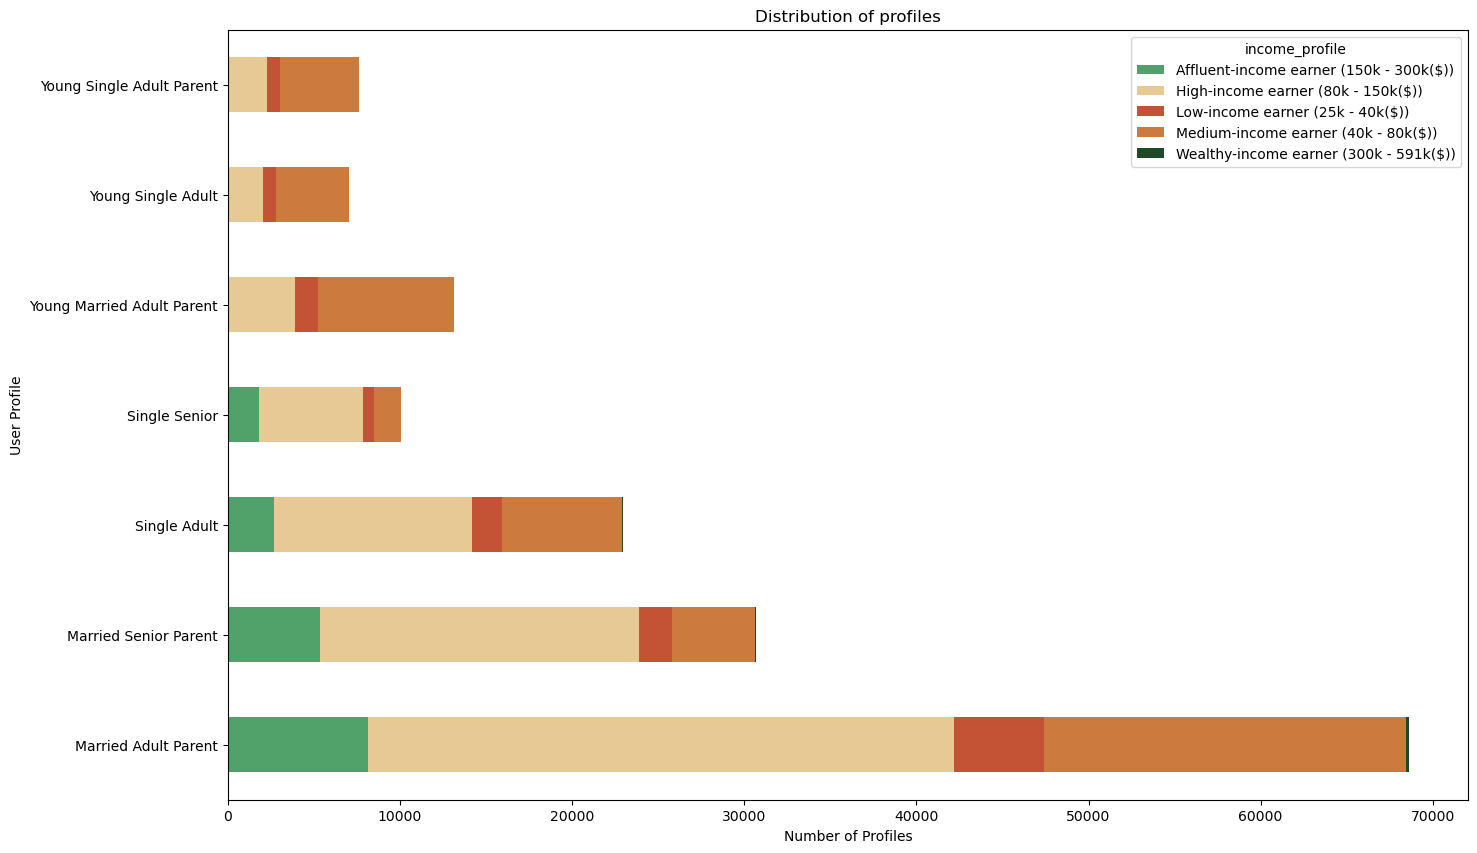

In [306]:
# plot the stacked bar chart
colors = ['#51a16a', '#e6c994', '#c45335', '#cc7a3d', '#1e4a28']
ax = crosstab2.plot.barh(stacked=True, color = colors, figsize=(16, 10))

# set labels and title
plt.xlabel('Number of Profiles')
plt.ylabel('User Profile')
plt.title('Distribution of profiles')


# display the chart
plt.show()

# 07.

In [274]:
# ggregate the max, mean, and min variables on a user level for usage frequency and expenditure.

df4 = df2.groupby('user_profile').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']}).reset_index()

In [275]:
df4.head(10)

user_profile days_since_prior_order                  prices  \
                                                 min   max       mean    min   
0        Married Adult Parent                    0.0  30.0  10.839626    1.0   
1       Married Senior Parent                    0.0  30.0  10.798944    1.0   
2                Single Adult                    0.0  30.0  10.751599    1.0   
3               Single Senior                    0.0  30.0  10.785123    1.0   
4  Young Married Adult Parent                    0.0  30.0  10.776373    1.0   
5          Young Single Adult                    0.0  30.0  10.962774    1.0   
6   Young Single Adult Parent                    0.0  30.0  10.750995    1.0   

                       
       max       mean  
0  99999.0  11.853053  
1  99999.0  11.751495  
2  99999.0  11.912025  
3  99999.0  12.062293  
4  99999.0  13.075411  
5  99999.0  12.883131  
6  99999.0  10.890167

# 08.

In [216]:
# create the subset with neccessary columns for crosstab

df5 = df2[['region', 'department_id', 'user_profile']]

In [217]:
# import department dictionary

dictionary = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [218]:
# rename column to an appropriate name

dictionary.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

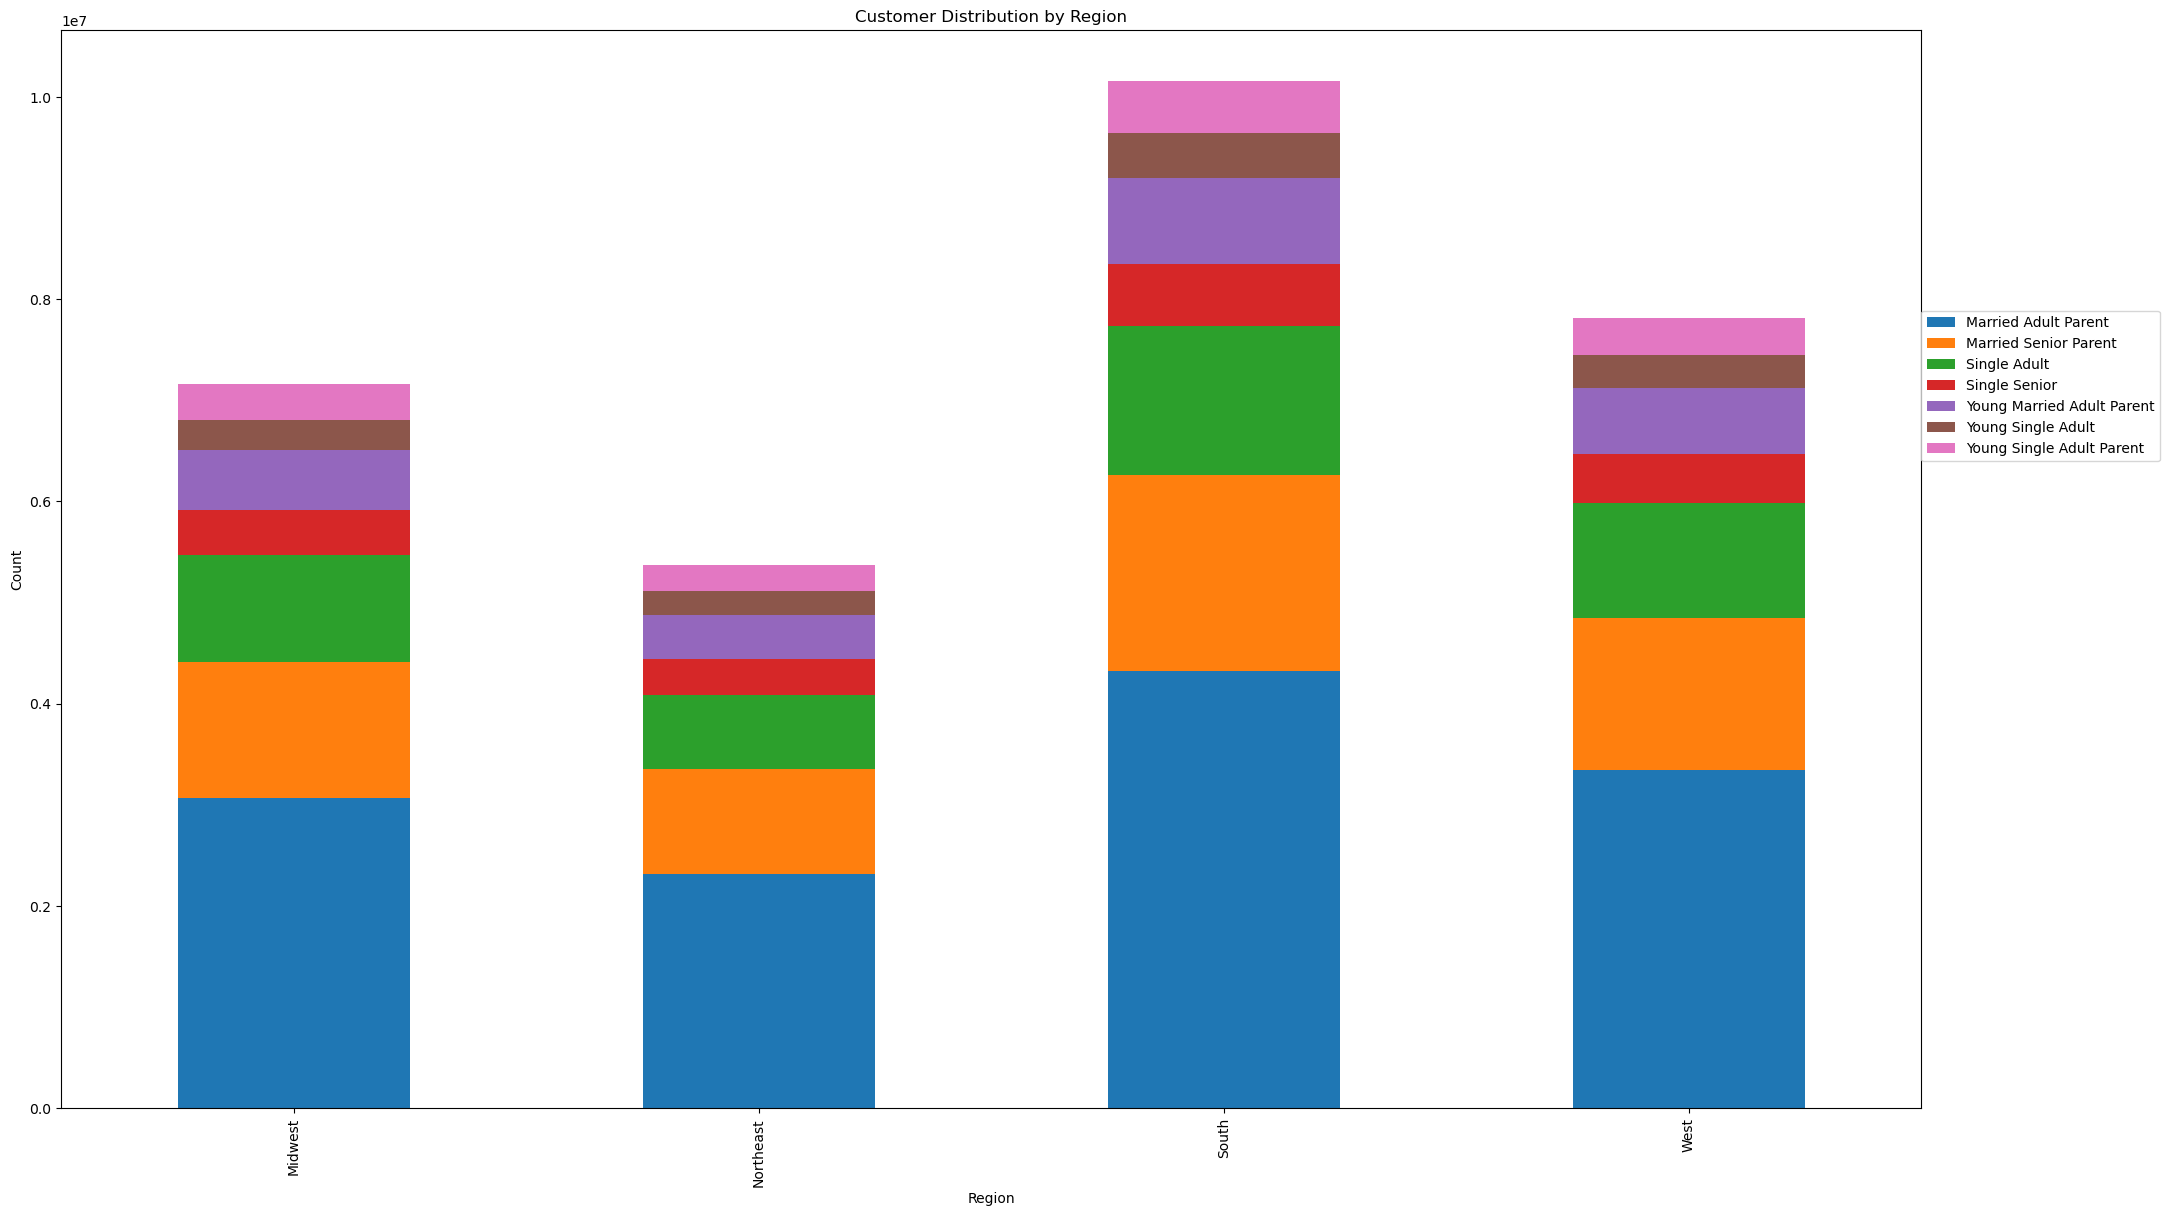

In [311]:
# plot the stacked bar chart
ct5 = pd.crosstab(df5['region'], df5['user_profile'])
ax2 = ct5.plot.bar(stacked=True, figsize=(24, 14))

# set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Distribution by Region')

plt.legend(loc=(1, 0.6))
# display the chart
plt.show()

In [220]:
# merge department dictionary with df5 dataframe

df_m2 = df5.merge(dictionary, how='left', on = 'department_id')

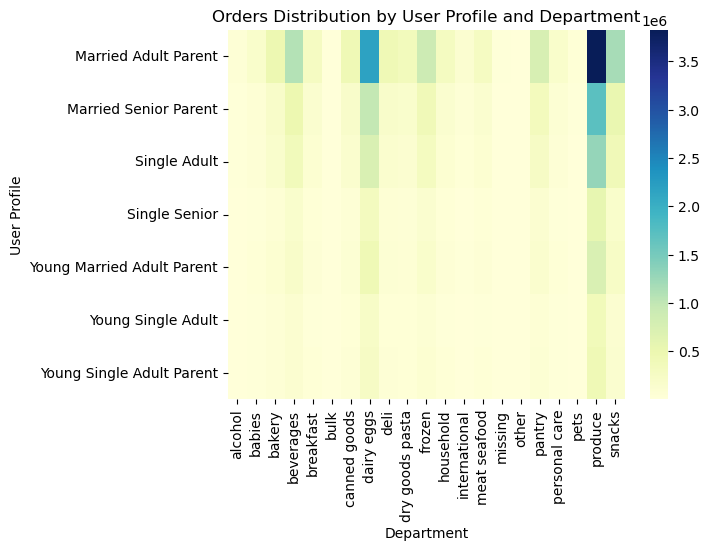

In [221]:
# plot the heatmap

ct6 = pd.crosstab(df_m2['user_profile'], df_m2['department'])
ax3 = sns.heatmap(ct6, cmap='YlGnBu')
 
# set labels and title

plt.title('Orders Distribution by User Profile and Department')
plt.xlabel('Department')
plt.ylabel('User Profile')
plt.show()

In [222]:
# delete the column

df_m2.drop('department_id', axis = 1, inplace = True)

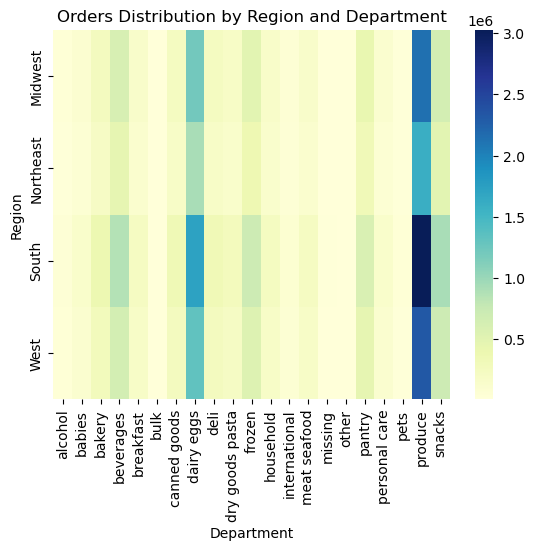

In [223]:
# plot the heatmap

ct7 = pd.crosstab(df_m2['region'], df_m2['department'])
ax4 = sns.heatmap(ct7, cmap='YlGnBu')

# set labels and title

plt.title('Orders Distribution by Region and Department')
plt.xlabel('Department')
plt.ylabel('Region')
plt.show()

## As the most populated region, south accounts the most users and therefore accounts the most orders. The produce department is the most bought department across all regions and all user groups. The diary eggs department comes after the produce department in terms of frequency of orders. All user groups are proportionally distributed across regions. Married Adult Parents (age: 29-64) is the most numerous user group, it is followed by Married Senior Parents (age: 65+) and Single Adults.

# 09.

In [224]:
# export visualizations

ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_distribution_4.10.png'))
ax2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_profiles_4.10.png'))
ax3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_1_4.10.png'), bbox_inches='tight')
ax4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_2_4.9.png'), bbox_inches='tight')

# 10.

In [325]:
# export the final dataset

df5.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))

# Key Question 1.

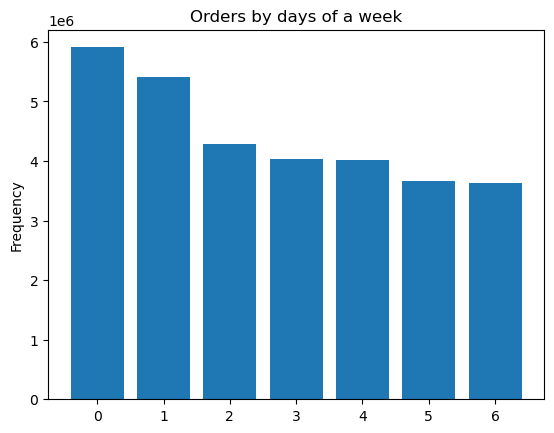

In [22]:
# set positions of the bars on the x-axis
x_positions = np.arange(len(df2['orders_day_of_a_week'].unique()))

# create a figure and axis object
fig, ax5 = plt.subplots()

# plot the bars
ax5.bar(x_positions, df2[['orders_day_of_a_week']].value_counts())

# set the labels
ax5.set_xticks(x_positions)
ax5.set_xticklabels(x_positions)
ax5.set_ylabel('Frequency')
ax5.set_title('Orders by days of a week')

plt.show()

ax5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_dow.png'))


In [34]:
sat = df2[df2['orders_day_of_a_week'].isin([0, 1])]

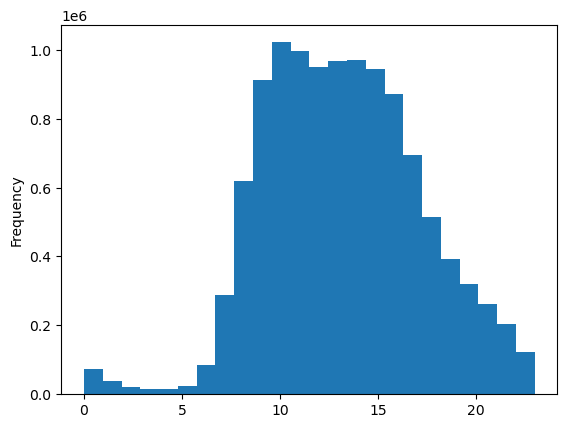

In [35]:
# plot a histogram with distribution of "order_hour_of_day" variable on saturday and sunday

sat_sun = sat['order_hour_of_day'].plot.hist(bins = 24)

# export the histogram

sat_sun.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distro_orders.png'))


# Key Question 2.

In [63]:
# sum prices by "order_hour_of_day" column
avg_prices = df2.groupby('order_hour_of_day')['prices'].agg(np.mean).reset_index()

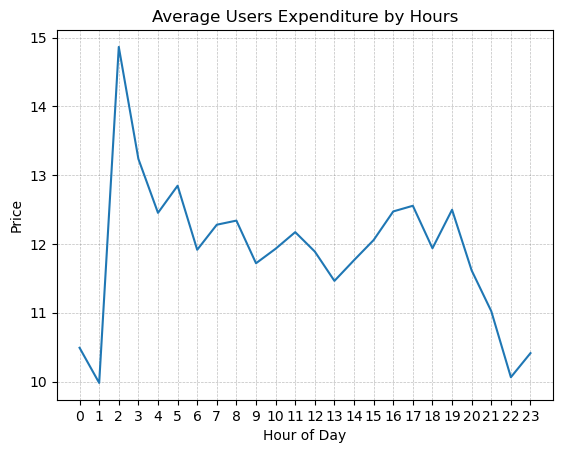

In [65]:
# create a figure and axis object
fig, ax7 = plt.subplots()

# plot the graph
ax7.plot(avg_prices['order_hour_of_day'], avg_prices['prices'])

# customize the graph
ax7.set_xlabel('Hour of Day')
ax7.set_ylabel('Price')
ax7.set_title('Average Users Expenditure by Hours')
ax7.set_xticks(avg_prices['order_hour_of_day'], minor=False)
ax7.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')


# show the graph
plt.show()

# export the graph
ax7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_by_hours.png'))


In [75]:
# create new subset with products ordered at second hour of a day
two_oclock = df2[df2['order_hour_of_day'] == 2]


,product_name,prices,order_hour_of_day,orders_day_of_a_week,user_profile,income_profile
279,Organic Egg Whites,11.3,2,6,Young Married Adult Parent,Medium-income earner (40k - 80k($))
369,Organic Egg Whites,11.3,2,1,Single Adult,Wealthy-income earner (300k - 591k($))
1742,Organic Egg Whites,11.3,2,0,Married Adult Parent,High-income earner (80k - 150k($))
2016,Organic Egg Whites,11.3,2,1,Married Adult Parent,High-income earner (80k - 150k($))
2598,Organic Egg Whites,11.3,2,0,Married Senior Parent,High-income earner (80k - 150k($))


In [138]:
# create frequency table of products ordered around 02:00 and rename columns

counts = two_oclock['product_name'].value_counts().reset_index()
counts.rename(columns = {'index': 'product_name', 'product_name': 'count'}, inplace=True)

In [176]:
# keep the products which are ordered more than 50 times

counts = counts[counts['count'] > 50]        

In [179]:
# sort the products by their count value

counts.sort_values(by=['count'], ascending=False, inplace=True)

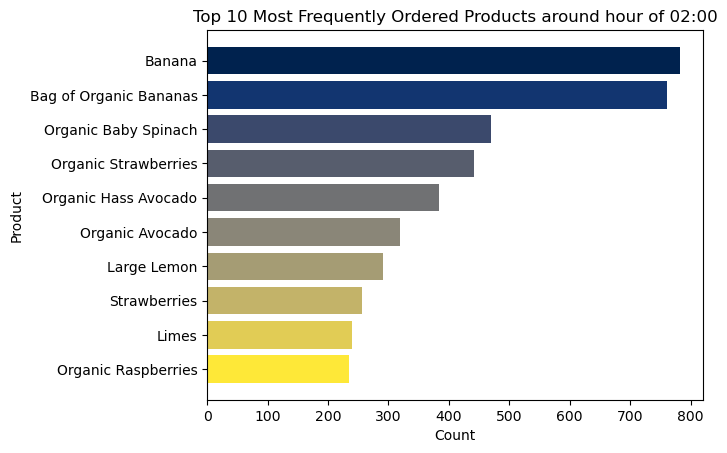

In [204]:
# create a figure and axis object
fig, ax8 = plt.subplots()

# colors
cmap = 'cividis'
colors = plt.get_cmap(cmap)(np.linspace(0, 1, len(counts[:10]['count']))) 

# plot the bars
ax8.barh(counts[:10]['product_name'].iloc[::-1], counts[:10]['count'].iloc[::-1], color=colors[::-1])


# set the labels
ax8.set_yticks(counts[:10]['product_name'])
ax8.set_ylabel('Product')
ax8.set_xlabel('Count')
ax8.set_title('Top 10 Most Frequently Ordered Products around hour of 02:00')

plt.show()

ax8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top10_prods.png'), bbox_inches='tight')

# Key Question 3.

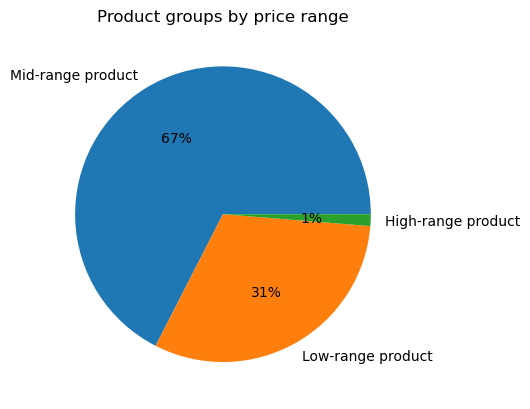

In [207]:
# plot the pie chart for product categories by price range

flags_count = df2['price_range'].value_counts()
fig, ax9 = plt.subplots()
pie = ax9.pie(flags_count,labels = flags_count.index, autopct='%1.0f%%')
ax9.set_title('Product groups by price range')


# export the pie
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range.png'))


In [208]:
# Create the new subset with Mid-range products only

mid_prods = df2[df2['price_range'] == "Mid-range product"]

In [211]:
# create frequency table of top 10 mid-range products and rename the columns

counts_prods = mid_prods['product_name'].value_counts().reset_index()[:10]
counts_prods.rename(columns = {'index': 'product_name', 'product_name': 'count'}, inplace=True)

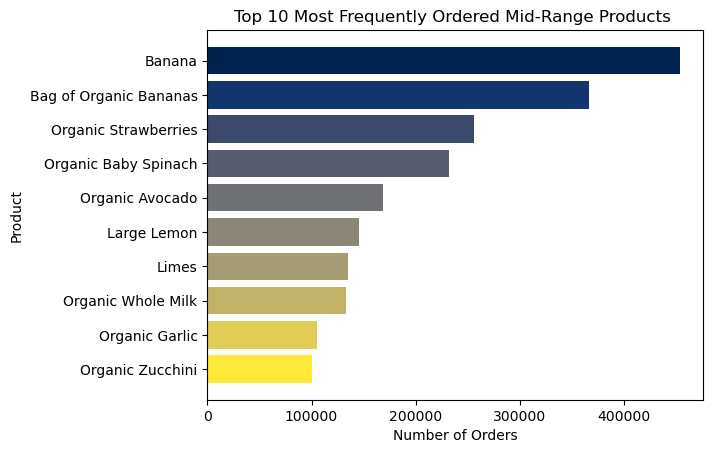

In [215]:
# create a figure and axis object
fig, ax9 = plt.subplots()

# colors
cmap = 'cividis'
colors = plt.get_cmap(cmap)(np.linspace(0, 1, len(counts_prods['count']))) 

# plot the bars
ax9.barh(counts_prods['product_name'].iloc[::-1], counts_prods['count'].iloc[::-1], color=colors[::-1])


# set the labels
ax9.set_yticks(counts_prods['product_name'])
ax9.set_ylabel('Product')
ax9.set_xlabel('Number of Orders')
ax9.set_title('Top 10 Most Frequently Ordered Mid-Range Products ')

plt.show()

ax9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top10_mid_range_prods.png'), bbox_inches='tight')

# Key Question 05.

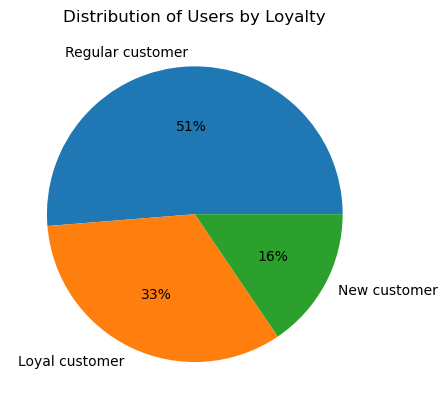

In [226]:
# plot the pie chart for product categories by price range

loyal_count = df2['loyalty_flag'].value_counts()
fig, ax10 = plt.subplots()
pie = ax10.pie(loyal_count, labels = loyal_count.index, autopct='%1.0f%%')
ax10.set_title('Distribution of Users by Loyalty')


# export the pie
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_flags.png'))


In [228]:
# merge df2 with departments

w_deps = df2.merge(dictionary, how='left', on = 'department_id')

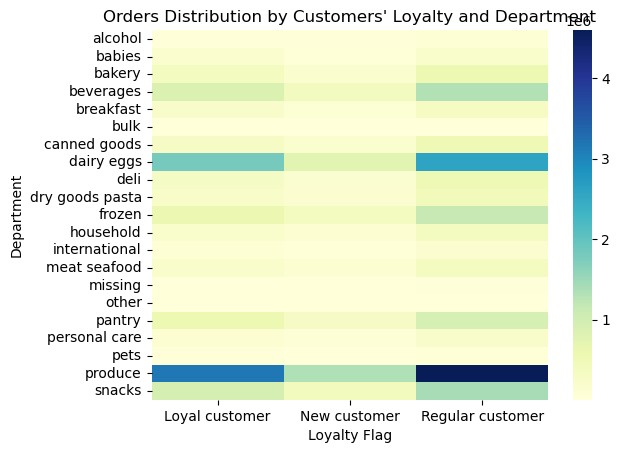

In [231]:
# plot the heatmap

ct8 = pd.crosstab(w_deps['department'], w_deps['loyalty_flag'])
ax11 = sns.heatmap(ct8, cmap='YlGnBu')

# set labels and title

plt.title("Orders Distribution by Customers' Loyalty and Department")
plt.xlabel('Loyalty Flag')
plt.ylabel('Department')
plt.show()

# export the heatmap
ax11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_loyalty.png'), bbox_inches='tight')

In [249]:
# create subset of only 'user_id', 'user_profile' and 'spending_flag'

users = w_deps[['user_id', 'user_profile', 'spending_flag']]

In [259]:
# remove all duplicates by 'user_id' column

users = users.drop_duplicates(subset=['user_id']).reset_index()

In [267]:
# create the crosstab for Distribution of Profiles by Spending

ct9 = pd.crosstab(users['user_profile'], users['spending_flag'])

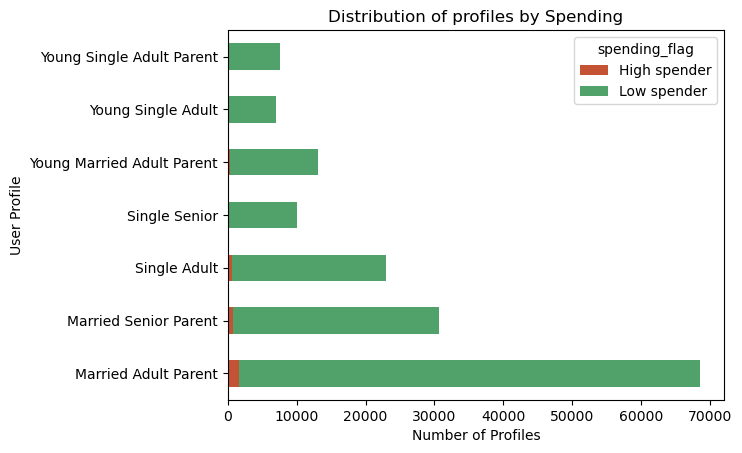

In [269]:
# plot the stacked bar chart
colors = ['#c45335', '#51a16a']
ax12 = ct9.plot.barh(stacked=True, color = colors)

# set labels and title
plt.xlabel('Number of Profiles')
plt.ylabel('User Profile')
plt.title('Distribution of Profiles by Spending')
plt.ticklabel_format(style='plain', axis='x')

# display the chart
plt.show()

In [270]:
# export the chart
ax12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_spending.png'), bbox_inches='tight')

In [271]:
# create the subset of only 'user_profile' and 'product_name' columns

users_prods = w_deps[['user_profile', 'product_name']]

In [278]:
# create the subset of only 'Married Adult Parent' user group

ma_parent = users_prods[users_prods['user_profile'] == 'Married Adult Parent']

In [279]:
# create the subset of only 'Married Senior Parent' user group

ms_parent = users_prods[users_prods['user_profile'] == 'Married Senior Parent']

In [299]:
# get top 20 most ordered products for 'Married Adult Parent' user group

ma_parent_prods = ma_parent['product_name'].value_counts()[:20]

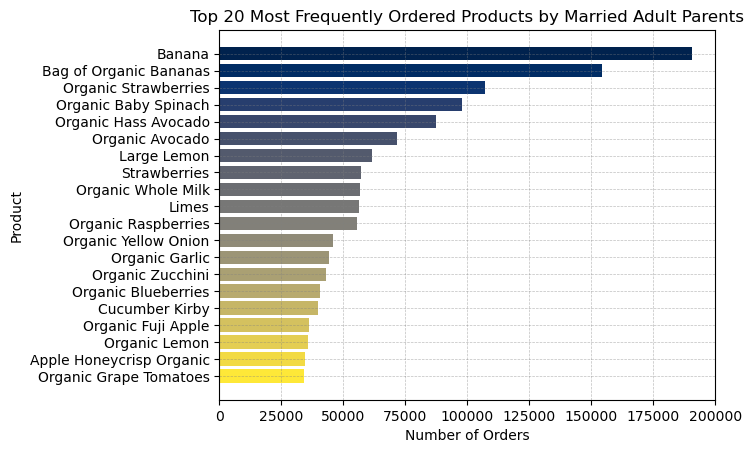

In [307]:
# create a figure and axis object
fig, ax13 = plt.subplots()

# colors
cmap = 'cividis'
colors = plt.get_cmap(cmap)(np.linspace(0, 1, len(ma_parent_prods.values))) 

# plot the bars
ax13.barh(ma_parent_prods.index.values[::-1], ma_parent_prods.values[::-1], color=colors[::-1])


# set the labels
ax13.set_yticks(ma_parent_prods.index.values)
ax13.set_ylabel('Product')
ax13.set_xlabel('Number of Orders')
ax13.set_title('Top 20 Most Frequently Ordered Products by Married Adult Parents')
ax13.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.show()

# export the chart
ax13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top20_prods_marr_adult_parent.png'), bbox_inches='tight')

In [308]:
# get top 20 most ordered products for 'Married Senior Parent' user group
ms_parent_prods = ms_parent['product_name'].value_counts()[:20]

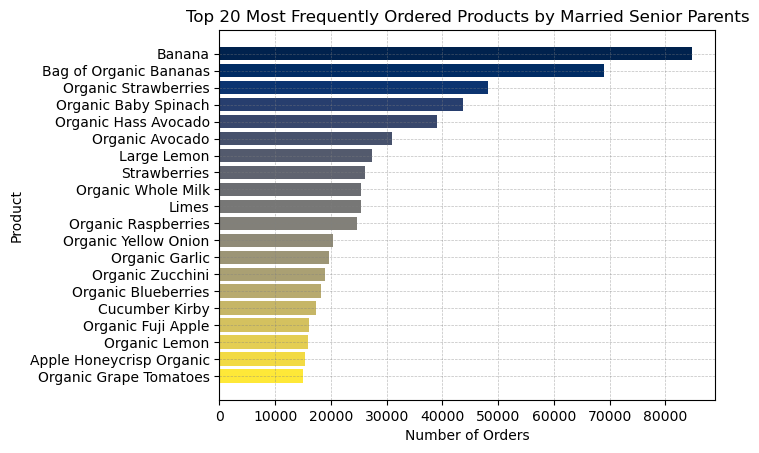

In [309]:
# create a figure and axis object
fig, ax14 = plt.subplots()

# colors
cmap = 'cividis'
colors = plt.get_cmap(cmap)(np.linspace(0, 1, len(ms_parent_prods.values))) 

# plot the bars
ax14.barh(ms_parent_prods.index.values[::-1], ms_parent_prods.values[::-1], color=colors[::-1])


# set the labels
ax14.set_yticks(ms_parent_prods.index.values)
ax14.set_ylabel('Product')
ax14.set_xlabel('Number of Orders')
ax14.set_title('Top 20 Most Frequently Ordered Products by Married Senior Parents')
ax14.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.show()

# export the chart
ax14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top20_prods_marr_senior_parent.png'), bbox_inches='tight')